In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Saving TSLA.csv to TSLA.csv
Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [2]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [3]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [4]:
model1 = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))
# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0600
Epoch 2/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0152
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0145
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0122
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0133
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0120
Epoch 7/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0113
Epoch 8/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0111
Epoch 9/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0113
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0107
Epoch 11/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0104
Epoch 12/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0091
Epoch 13/100
24/24 [=====

In [5]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (528, 60, 1)

(528, 60, 1)


In [6]:
predicted_stock_price = model1.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

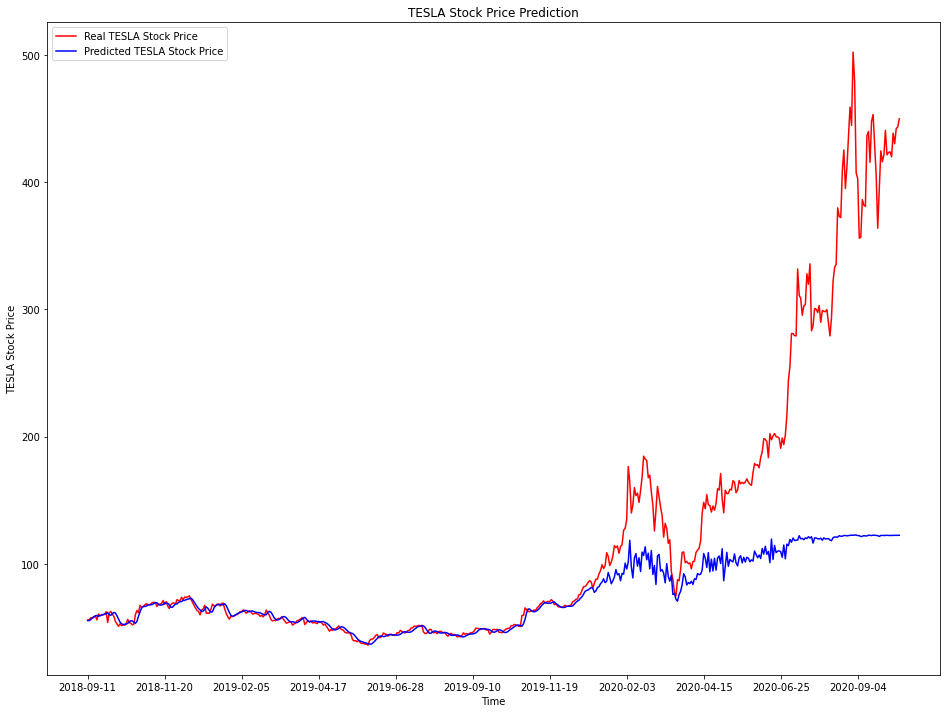

In [7]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red',
         label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue',
         label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

Build the input features with lag 7

In [8]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 7):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model1.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

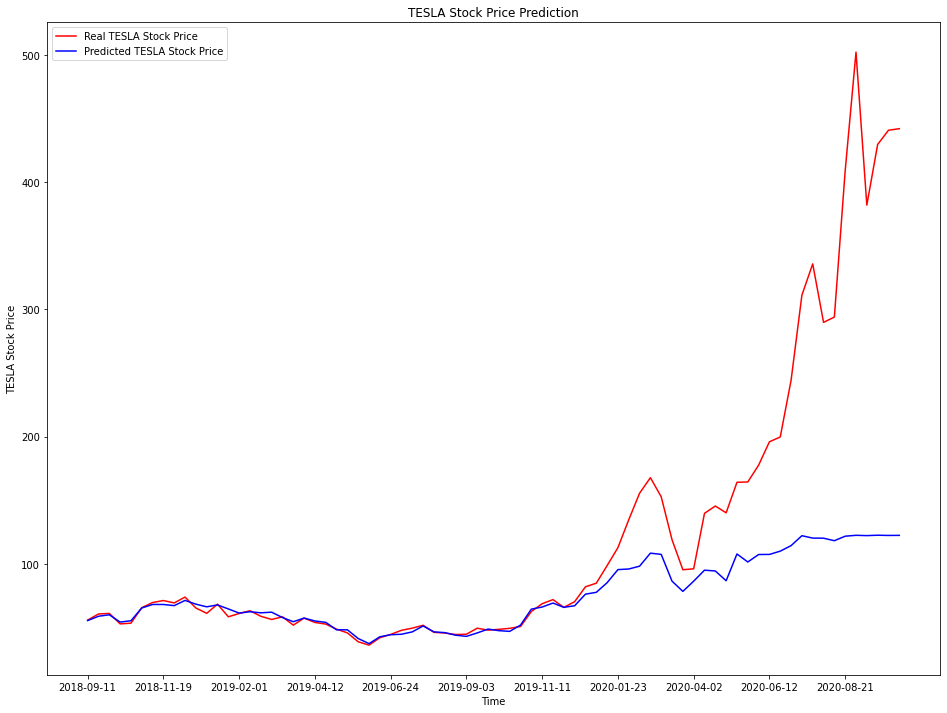

In [9]:
# Visualising the results
plt.plot(df.loc[800::7, 'Date'],dataset_test.values[::7], color = 'red',
         label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::7, 'Date'],predicted_stock_price, color = 'blue',
         label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,76,7))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

Build the input features with lag 14

In [10]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 14):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model1.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

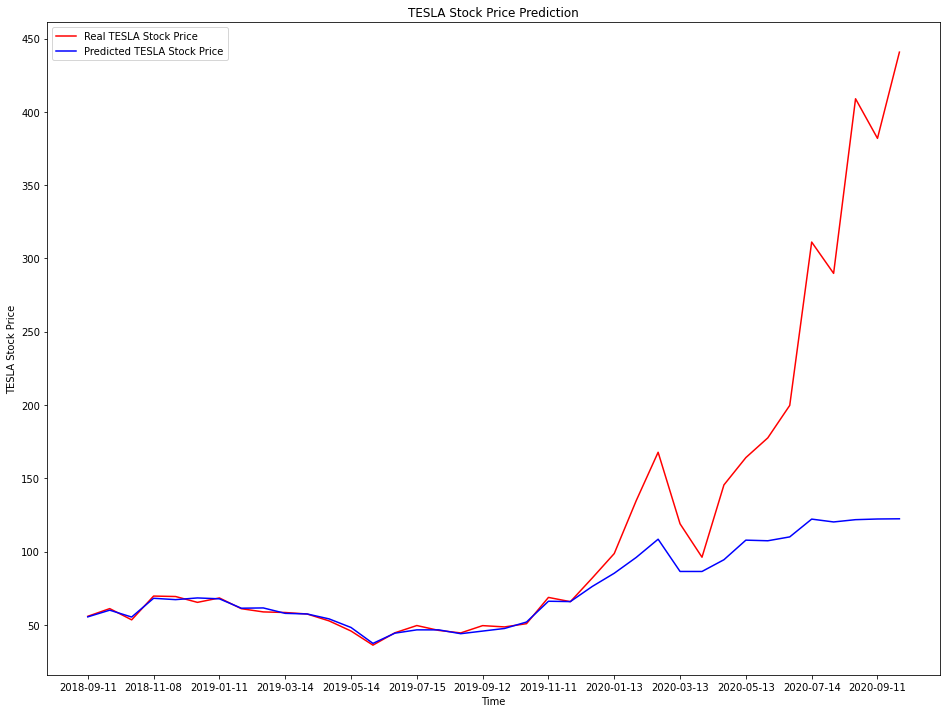

In [11]:
# Visualising the results
plt.plot(df.loc[800::14, 'Date'],dataset_test.values[::14], color = 'red',
         label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price, color = 'blue',
         label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,38,3))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

lag 14 with 6 hidden layers

In [12]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 1s 22ms/step - loss: 0.0752
Epoch 2/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0192
Epoch 3/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0175
Epoch 4/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0161
Epoch 5/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0147
Epoch 6/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0165
Epoch 7/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0136
Epoch 8/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0134
Epoch 9/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0134
Epoch 10/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0136
Epoch 11/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0119
Epoch 12/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0157
Epoch 13/100
24/24 [=====

In [14]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 14):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price_2 = model2.predict(X_test)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

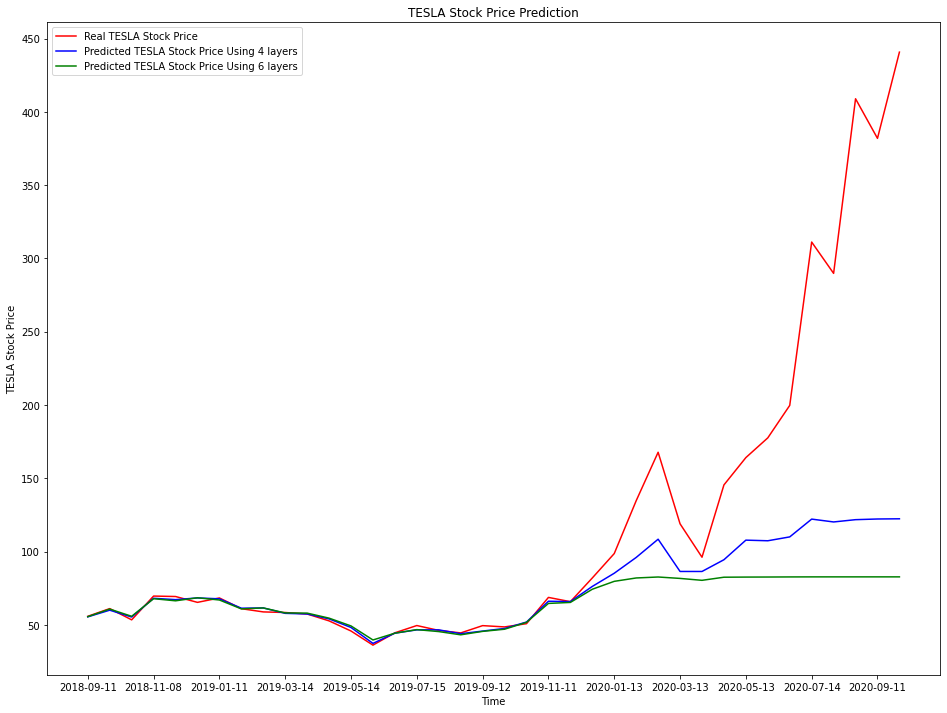

In [15]:
# Visualising the results of comparison
plt.plot(df.loc[800::14, 'Date'],dataset_test.values[::14], color = 'red',
         label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price, color = 'blue',
         label = 'Predicted TESLA Stock Price Using 4 layers')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price_2, color = 'green',
         label = 'Predicted TESLA Stock Price Using 6 layers')
plt.xticks(np.arange(0,38,3))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

lag 14 with 4 layers and dropout 0.1

In [16]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
model3 = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model3.add(Dropout(0.1))
# Adding a second LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.1))
# Adding a third LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.1))
# Adding a fourth LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50))
model3.add(Dropout(0.1))
# Adding the output layer
model3.add(Dense(units = 1))

# Compiling the RNN
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model3.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0761
Epoch 2/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0145
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0122
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0105
Epoch 5/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0112
Epoch 6/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0103
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0112
Epoch 8/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0096
Epoch 9/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0093
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0098
Epoch 11/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0094
Epoch 12/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0082
Epoch 13/100
24/24 [=====

In [18]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 14):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price_3 = model3.predict(X_test)
predicted_stock_price_3 = sc.inverse_transform(predicted_stock_price_3)

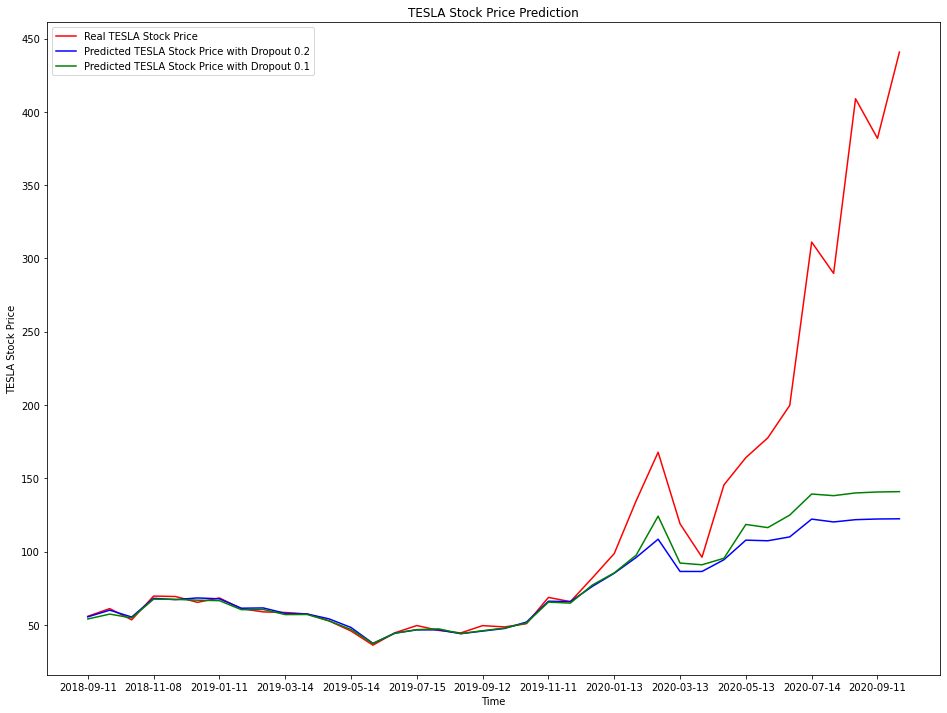

In [19]:
# Visualising the results of comparison
plt.plot(df.loc[800::14, 'Date'],dataset_test.values[::14], color = 'red',
         label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price, color = 'blue',
         label = 'Predicted TESLA Stock Price with Dropout 0.2')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price_3, color = 'green',
         label = 'Predicted TESLA Stock Price with Dropout 0.1')
plt.xticks(np.arange(0,38,3))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

Predictions for future 2 weeks

In [20]:
## predict price in two weeks
# calculate date difference
from datetime import datetime
cur_day = datetime(2020, 10, 14)
end_day = datetime(2020, 10, 28)
time_horizon = (end_day - cur_day).days

In [21]:
# get the date of following two weeks
dates = df['Date']
last_date = '2020-10-15'
timestamp_list = pd.date_range(last_date, periods = time_horizon).tolist()
datestring_list = [i.strftime("%Y-%m-%d") for i in timestamp_list] 
datestring_list

['2020-10-15',
 '2020-10-16',
 '2020-10-17',
 '2020-10-18',
 '2020-10-19',
 '2020-10-20',
 '2020-10-21',
 '2020-10-22',
 '2020-10-23',
 '2020-10-24',
 '2020-10-25',
 '2020-10-26',
 '2020-10-27',
 '2020-10-28']

In [22]:
# delete weekends
index = [2,3,9,10]
to_del = object()
for ind in index:
    datestring_list[ind] = to_del
for i in index:
    datestring_list.remove(to_del)
datestring_list

['2020-10-15',
 '2020-10-16',
 '2020-10-19',
 '2020-10-20',
 '2020-10-21',
 '2020-10-22',
 '2020-10-23',
 '2020-10-26',
 '2020-10-27',
 '2020-10-28']

In [23]:
len(datestring_list)

10

In [24]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
#get the test data
for i in range(60, 538):
    X_test.append(inputs[i-60:i, 0])

# X_test.shape[0] has 478 values, we want use the last 10 value to predict 
del X_test[0:468]
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(10, 60, 1)


In [26]:
predicted_stock_price = model1.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

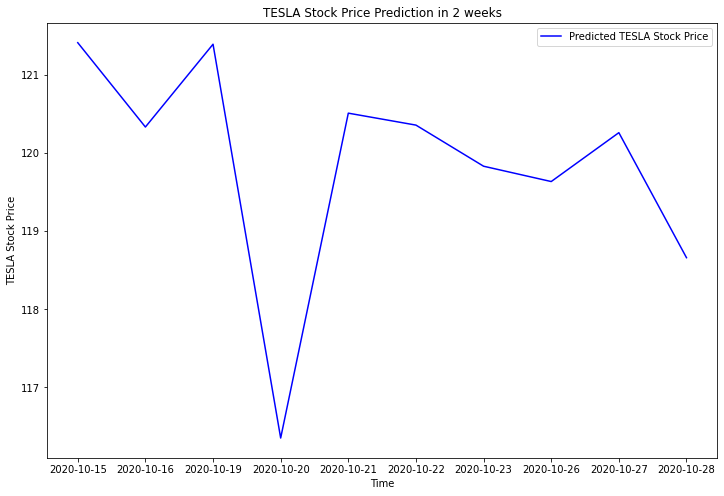

In [27]:
# Visualising the results
plt.plot(datestring_list,predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,10))
plt.title('TESLA Stock Price Prediction in 2 weeks')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(12,8)
plt.show()